In [53]:
## Import Video Using Glob
import os
from glob import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import dlib

## Opening Video with Cv2

In [54]:
video_path = os.path.join(os.getcwd(), 'attachment', 'sample-renamed.mp4')

if not os.path.exists(video_path):
    print("File not found")
    exit()

In [55]:
## Getting the Video Frame
videoCapture = cv2.VideoCapture(video_path)

## Getting the Frame
video_frames = []
i = 0

## Reading the video and append to the video_frames
## Since the video length is 1 minute, with 30 fps, we will get 1800 frames
while i < 150:
    ## Read the frame
    ret, frame = videoCapture.read()

    ## Break if frame is empty
    if not ret:
        break

    ## Append the frame
    video_frames.append(frame)

    ## Show the frame
    cv2.imshow("Frame", frame)

    ## Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break 
    
    i += 1

videoCapture.release()
cv2.destroyAllWindows()

video_frames = np.array(video_frames)


## Code explanation
- `videoCapture.release()`: Releases the video capture object and frees up resources.
- `cv2.destroyAllWindows()`: Closes all OpenCV windows that were opened during the program execution.
- It is important to include videoCapture.release() and cv2.destroyAllWindows() to ensure that resources are properly released and all OpenCV windows are closed. This helps to avoid resource leakage and keeps the system clean.




In [56]:
## Print shape of the video frames
print(video_frames.shape)

(150, 1080, 1920, 3)


## Explanation
The shape of the video_frames array (150, 1440, 2560, 3) can be elaborated as follows:

150:

This represents the number of frames captured from the video. In this case, 150 frames were read and stored in the video_frames array.
1440:

This is the height of each frame in pixels. Each frame has 1440 rows of pixels.
2560:

This is the width of each frame in pixels. Each frame has 2560 columns of pixels.
3:

This represents the number of color channels in each pixel. Typically, this is 3 for RGB images, where each pixel has three values corresponding to the Red, Green, and Blue color channels.


## Display one of the Frame

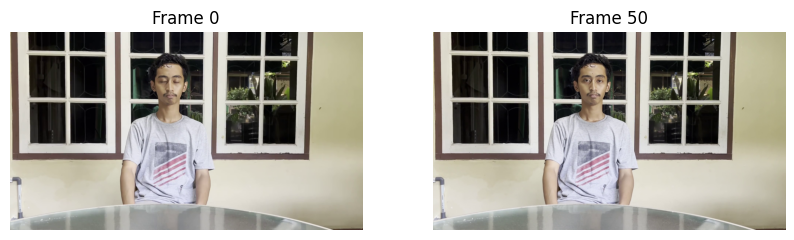

In [57]:
img_frame0 = video_frames[0]
img_frame1 = video_frames[50]

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_frame0, cv2.COLOR_BGR2RGB))
plt.title('Frame 0')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_frame1, cv2.COLOR_BGR2RGB))
plt.title('Frame 50')
plt.axis('off')

plt.show()

## Creating a new Video out of Frame using Cv2

In [58]:
## Fill the new Array with the difference of the two frames
## This will create a video with duration of 1 minute
new_video_frames = ([img_frame0 if i % 2 == 0 else img_frame1 for i in range(150)])
print(len(new_video_frames))
print(new_video_frames[0].shape)

150
(1080, 1920, 3)


In [59]:
## Setting the output path
output_path = os.path.join(os.getcwd(), 'attachment', 'output-written-5fps.mp4')

## Writing the video
height, width, layers = new_video_frames[0].shape
print(f"Height: {height}, Width: {width}, Layers: {layers}")
size = (width, height)

Height: 1080, Width: 1920, Layers: 3


In [60]:
## Define the codec and create VideoWriter object
## Setting the FPS to be around 5 to get 30 sedonds video
output = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'DIVX'), 5, size)

## Write the frames
for frame in new_video_frames:
    output.write(frame)
output.release()

## Parameters

```python
output = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'DIVX'), 30, size)
```

1. output_path:
This is the path where the output video file will be saved.
It should be a string representing the file path, e.g., 'output.avi'.

2. cv2.VideoWriter_fourcc(*'DIVX'):
This specifies the codec to be used for encoding the video.
cv2.VideoWriter_fourcc is a helper function to specify the codec.
The *'DIVX' argument specifies the codec as DIVX, which is a popular codec for AVI files.
Other common codecs include 'XVID', 'MJPG', 'X264', etc.

3. 30:
This is the frame rate of the output video.
It specifies the number of frames per second (fps) in the output video.
In this case, the frame rate is set to 30 fps.

4. size:
This specifies the size (width and height) of the video frames.
It should be a tuple representing the dimensions, e.g., (width, height).
All frames written to the video file must have this size.


---

## Detecting face with DLIB

In [61]:
## Copy the first video frames
img_frame0 = video_frames[0].copy()
img_frame0 = cv2.cvtColor(img_frame0, cv2.COLOR_BGR2RGB)
img_frame0_gray = cv2.cvtColor(img_frame0, cv2.COLOR_BGR2GRAY)

## Using Detector Dlib for Face Detection
detector = dlib.get_frontal_face_detector()
faces = detector(img_frame0_gray, 1)
print(f"Jumlah wajah yang terdeteksi: {len(faces)}")
print(f"Koordinat wajah: {faces}")

Jumlah wajah yang terdeteksi: 1
Koordinat wajah: rectangles[[(778, 222) (964, 407)]]


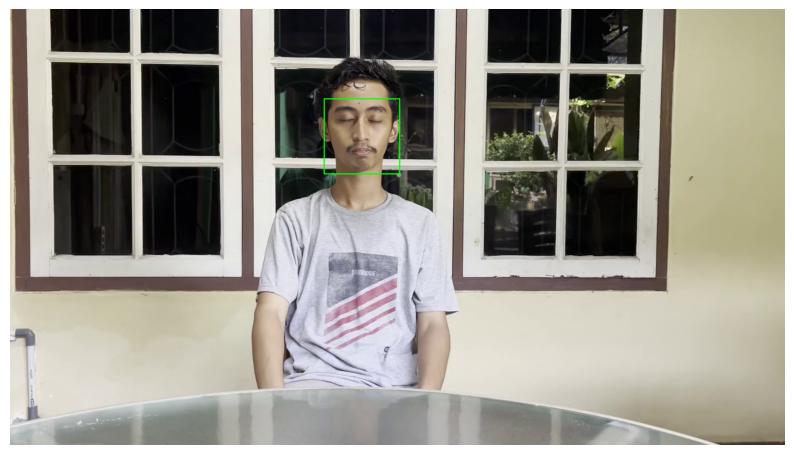

In [62]:
## Obtain the face coordinates
for face in faces:
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    cv2.rectangle(img_frame0, (x, y), (x+w, y+h), (0, 255, 0), 2)

## Obtain the first image coordinates
x1, y1, w, h = faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height()
x2, y2 = x1 + w, y1 + h
cv2.rectangle(img_frame0, (x1, y1), (x2, y2), (0, 255, 0), 2)

## Show the rectangle image
plt.figure(figsize=(10, 10))
plt.imshow(img_frame0)
plt.axis('off')
plt.show()

## Detection Face in Video

In [63]:
## Detection In Video
videoCapture = cv2.VideoCapture(video_path)

## Setup the frame counter
i = 0

## Setup the Dlib Detector
detector = dlib.get_frontal_face_detector()

## Setting the ouput Video
output_path = os.path.join(os.getcwd(), 'attachment', 'output-face-detection.mp4')
height, width, layers = video_frames[0].shape
print(f"Height: {height}, Width: {width}, Layers: {layers}")
size = (width, height)

## Make a file Video
output = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'DIVX'), 30, size)

while i < 150:
    ## Read the frame
    ret, frame = videoCapture.read()

    ## Break if frame is empty
    if not ret:
        break

    ## Convert the frame to gray
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)   

    ## Detect the face
    faces = detector(frame_gray, 1)
    x1, y1, w, h = faces[0].left(), faces[0].top(), faces[0].width(), faces[0].height()
    x2, y2 = x1 + w, y1 + h

    ## Draw the rectangle
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    ## Write the frame
    output.write(frame)

    ## Increment the counter
    i += 1

videoCapture.release()  
cv2.destroyAllWindows()
output.release()


Height: 1080, Width: 1920, Layers: 3
